In [1]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline

In [53]:
#1.1
Sig_Eqs= pd.read_csv("earthquakes-2025-11-05_21-33-51_+0800.tsv",sep="\t")

In [7]:
Sig_Eqs.head()

,Search Parameters,Id,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.0,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,5877.0,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [10]:
df1 = Sig_Eqs[Sig_Eqs["Country"].notna()]
deaths_by_country = df1.groupby("Country")["Total Deaths"].sum()

In [11]:
deaths_by_country

Country
AFGHANISTAN                             15245.0
ALBANIA                                  2827.0
ALGERIA                                 39339.0
ANTARCTICA                                  0.0
ANTIGUA AND BARBUDA                         0.0
                                         ...   
VENEZUELA                               44484.0
VIETNAM                                     0.0
WALLIS AND FUTUNA (FRENCH TERRITORY)        5.0
YEMEN                                    4071.0
ZAMBIA                                      0.0
Name: Total Deaths, Length: 158, dtype: float64

In [12]:
top10_deaths = deaths_by_country.sort_values(ascending=False).head(10)

print(top10_deaths)

Country
CHINA         2106524.0
TURKEY        1008863.0
IRAN           761654.0
SYRIA          487726.0
ITALY          423280.0
HAITI          323782.0
JAPAN          319443.0
AZERBAIJAN     319251.0
INDONESIA      282838.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64


In [15]:
#1.2
eq6 = Sig_Eqs[Sig_Eqs["Mag"] > 6]
count_per_year = eq6.groupby("Year").size().sort_index()
print(count_per_year)

Year
-2150.0     1
-2000.0     1
-1250.0     1
-1050.0     1
-479.0      1
           ..
 2021.0    23
 2022.0    21
 2023.0    27
 2024.0    13
 2025.0    18
Length: 552, dtype: int64


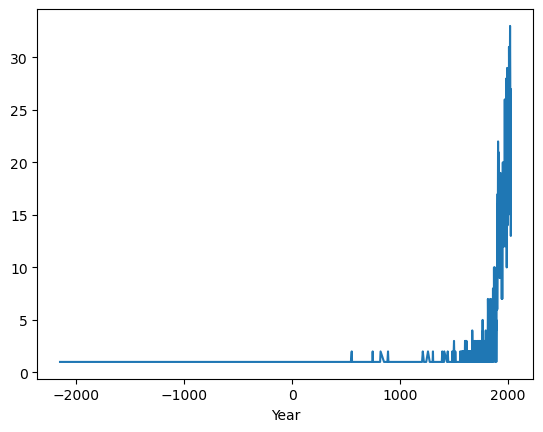

In [17]:
count_per_year.plot()
plt.show()
#观察到的趋势：接近2000年时，mag>6地震显著增多
#原因：可能是观测手段增强，或是人类对地质开发显著增多，引起地壳变化

In [37]:
#1.3
def CountEq_LargestEq(country_name):
    sub = Sig_Eqs[Sig_Eqs["Country"] == country_name]
    total_num = sub.shape[0]
    if total_num == 0:
        return total_num, None
    sub2 = sub[(sub["Mag"].notna()) & (sub["Year"].notna())]
    if sub2.shape[0] == 0:
        return total_num, None
    max_mag = sub2["Mag"].max()
    big_rows = sub2[sub2["Mag"] == max_mag]
    row_max = big_rows.iloc[0]
    year = int(row_max["Year"])
    month = int(row_max["Mo"])
    day = int(row_max["Dy"])
    date_str = str(year) + "-" + str(month) + "-" + str(day)
    return total_num, date_str

countries = Sig_Eqs["Country"].dropna().unique()
rows = []
for c in countries:
    total_num, date_str = CountEq_LargestEq(c)
    rows.append({"Country": c, "TotalEq": total_num, "LargestEqDate": date_str})

result_df = pd.DataFrame(rows)
result_df = result_df.sort_values("TotalEq", ascending=False)
print(result_df.head(10))

        Country  TotalEq LargestEqDate
14        CHINA      623     1668-7-25
33        JAPAN      424     2011-3-11
72    INDONESIA      421    2004-12-26
7          IRAN      388     856-12-22
9        TURKEY      358    1939-12-26
5         ITALY      333     1915-1-13
3        GREECE      289      365-7-21
55          USA      280     1964-3-28
70  PHILIPPINES      230     1897-9-21
51       MEXICO      214     1787-3-28


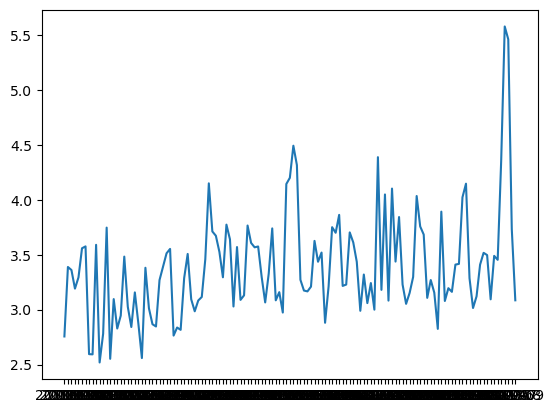

In [44]:
#2
df = pd.read_csv("2281305.csv",low_memory=False)
df["DATE"] = pd.to_datetime(df["DATE"])
df = df[(df["DATE"].dt.year >= 2010) & (df["DATE"].dt.year <= 2020)]
wnd = df["WND"].str.split(",", expand=True)
wnd.columns = ["dir", "dir_qc", "type", "speed", "speed_qc"]
df = df.join(wnd)
good_qc = ["0", "1", "4", "5", "9"]
df = df[df["speed_qc"].isin(good_qc)]
df["speed"] = pd.to_numeric(df["speed"], errors="coerce")
df.loc[df["speed"] == 9999, "speed"] = np.nan
df["wind_ms"] = df["speed"] / 10.0
df["year_month"] = df["DATE"].dt.to_period("M").astype(str)
monthly_ws = df.groupby("year_month")["wind_ms"].mean()
plt.plot(monthly_ws.index, monthly_ws.values)
plt.show()
#整体风速较为稳定，2020年风速有显著提高

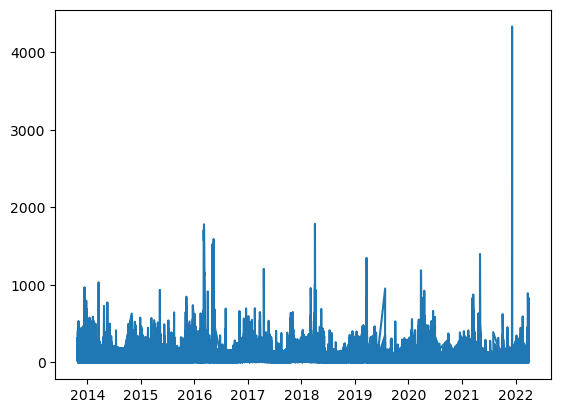

平均值 (mean): 42.05812105097342
中位数 (median): 32.0
标准差 (std): 38.15874445353411
最小值 (min): 0
最大值 (max): 4332
95% 分位数 (95th percentile): 110.0


In [65]:
#3.1 得到数据已经经过清洗
df = pd.read_csv("kongqi.csv", encoding="gbk")
df["日期"] = pd.to_datetime(df["日期"])
var = "PM2.5"
plt.plot(df["日期"], df[var])
plt.show()
#3.3
mean_value   = x.mean()    
median_value = x.median()   
std_value    = x.std()      
min_value    = x.min()     
max_value    = x.max()     
p95_value    = x.quantile(0.95)  
print("平均值 (mean):", mean_value)
print("中位数 (median):", median_value)
print("标准差 (std):", std_value)
print("最小值 (min):", min_value)
print("最大值 (max):", max_value)
print("95% 分位数 (95th percentile):", p95_value)